# EDA

## Import Libraries --------------------------------

In [92]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [93]:
#use Seaborn
plt.style.use('seaborn')

C:\Users\FHKHASAN\AppData\Local\Temp\ipykernel_21088\2885999651.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [94]:
sns.set(rc={'figure.figsize':(15, 8)})

## Load the dataset --------------------------------

In [95]:
df = pd.read_csv("dataset.csv")

## Display the first few rows of the dataset --------------------------------

In [98]:
print('Total rows:', df.shape[0])
print('Total features:', df.shape[1])

Total rows: 1000
Total features: 7


In [100]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,age,gender,income,daily_hours_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status
0,56,Male,49241,2,0,39.469877,Good
1,46,Female,64569,2,7,36.064939,Fair
2,32,Female,31745,1,9,36.829770,Poor
3,60,Female,46029,0,5,38.666252,Very Good
4,25,Male,33025,0,4,20.329725,Excellent


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   income                         1000 non-null   int64  
 3   daily_hours_physical_activity  1000 non-null   int64  
 4   servings_fruits_veggies        1000 non-null   int64  
 5   BMI                            1000 non-null   float64
 6   self_reported_health_status    1000 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


## Generate summary statistics --------------------------------

In [102]:
print("\nSummary statistics of the dataset:")
df.describe()


Summary statistics of the dataset:


,age,income,daily_hours_physical_activity,servings_fruits_veggies,BMI
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000
mean,40.986000,59872.392000,0.983000,4.5120,28.903053
std,13.497852,22721.921068,0.830301,2.8869,6.131896
min,18.000000,20162.000000,0.000000,0.0000,18.500660
25%,29.000000,41784.750000,0.000000,2.0000,23.526589
50%,42.000000,58750.500000,1.000000,5.0000,28.757535
75%,52.000000,79689.250000,2.000000,7.0000,34.161508
max,64.000000,99973.000000,2.000000,9.0000,39.990491


## Create visualizations --------------------------------

### AGE visualization --------------------------------

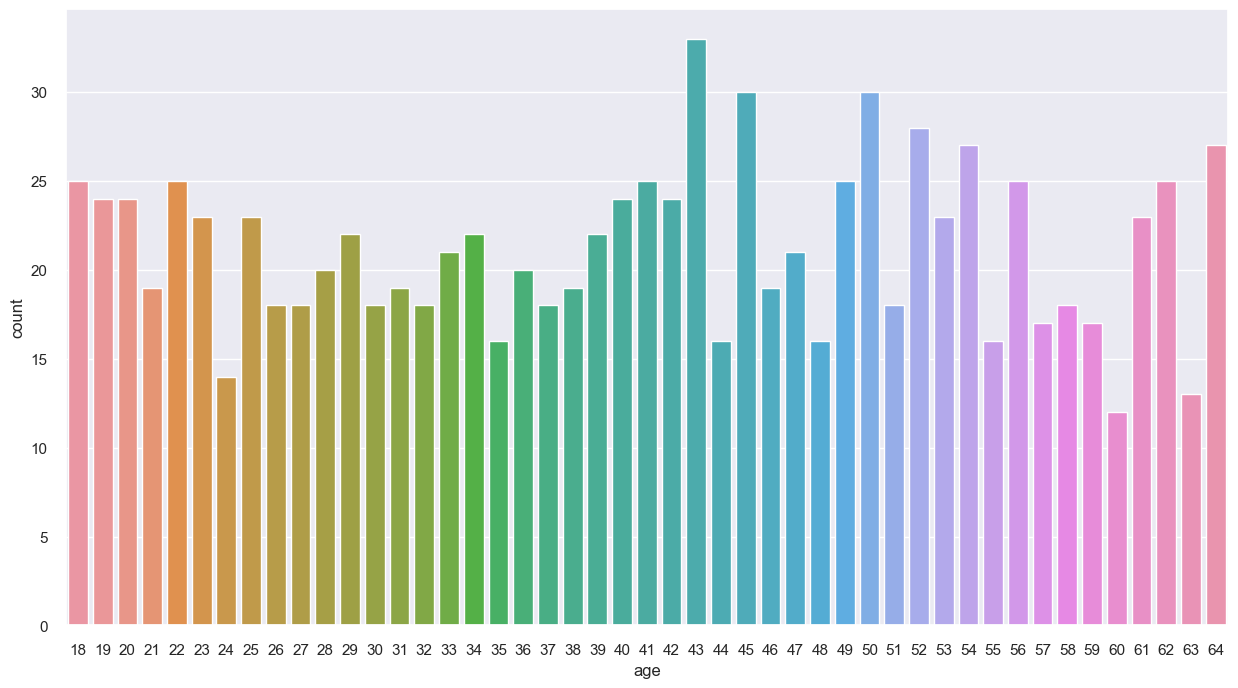

<Figure size 2000x2000 with 0 Axes>

In [76]:
sns.countplot(x='age', data=df)
plt.figure(figsize=(20, 20))
plt.show()

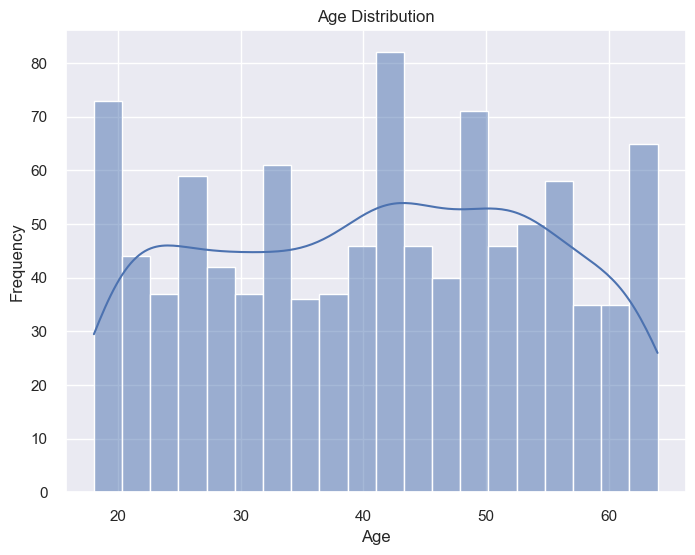

In [77]:
# Histogram of age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Gender visualization --------------------------------

In [78]:
np.unique(df['gender'])

array(['Female', 'Male'], dtype=object)

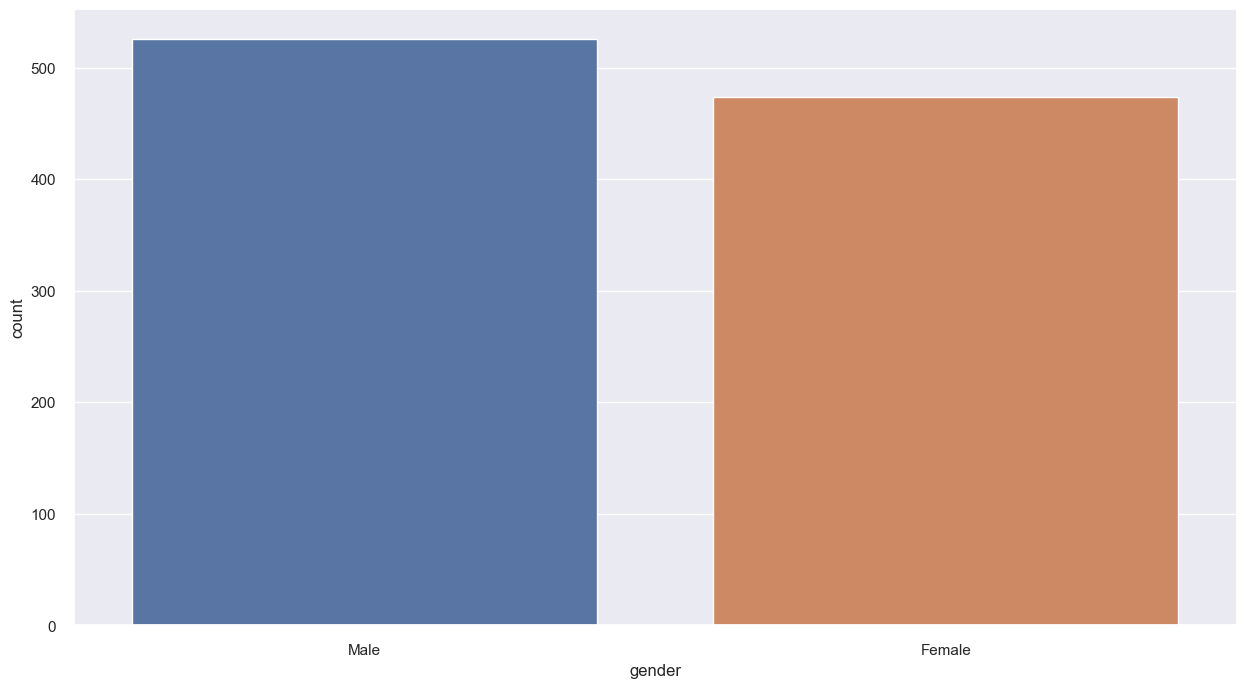

<Figure size 2000x2000 with 0 Axes>

In [79]:
sns.countplot(x='gender', data=df)
plt.figure(figsize=(20, 20))
plt.show()

### Income visualization --------------------------------

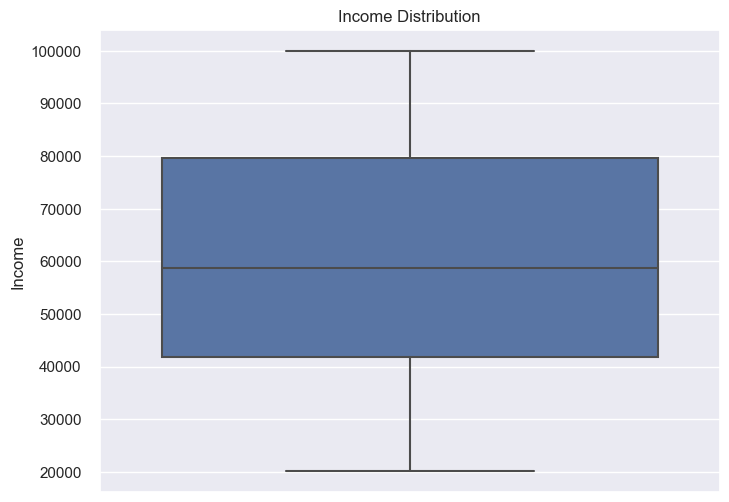

In [80]:
# Box plot of income
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='income')
plt.title('Income Distribution')
plt.ylabel('Income')
plt.show()

### BMI, Servings of fruits, self_reported_health_status --------------------------------

In [81]:
np.unique(df['self_reported_health_status'])

array(['Excellent', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)

Box plot of BMI and servings_fruits_veggies colored by self-reported health status:


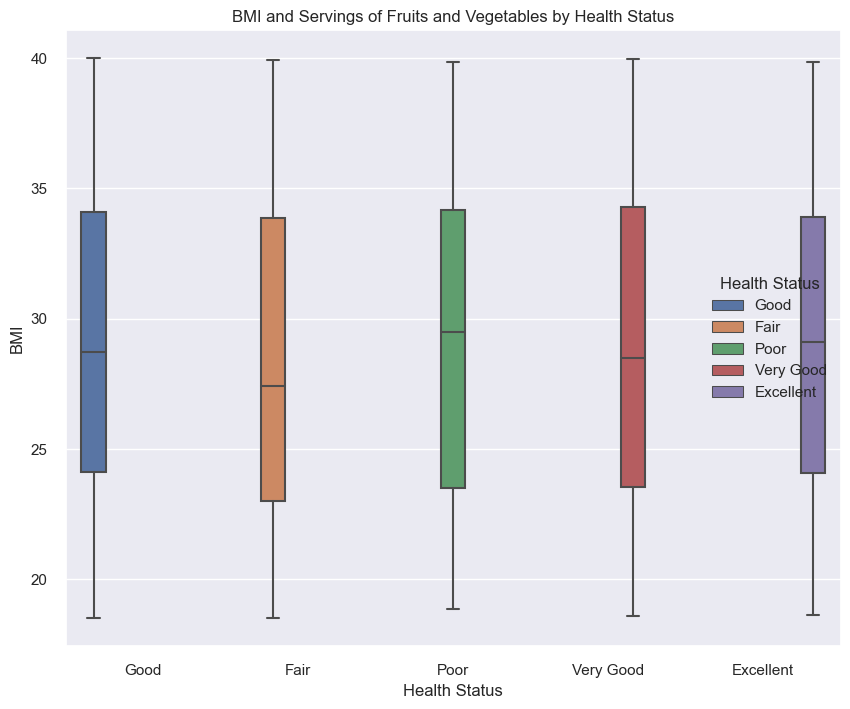

Box plot of servings_fruits_veggies colored by self-reported health status:


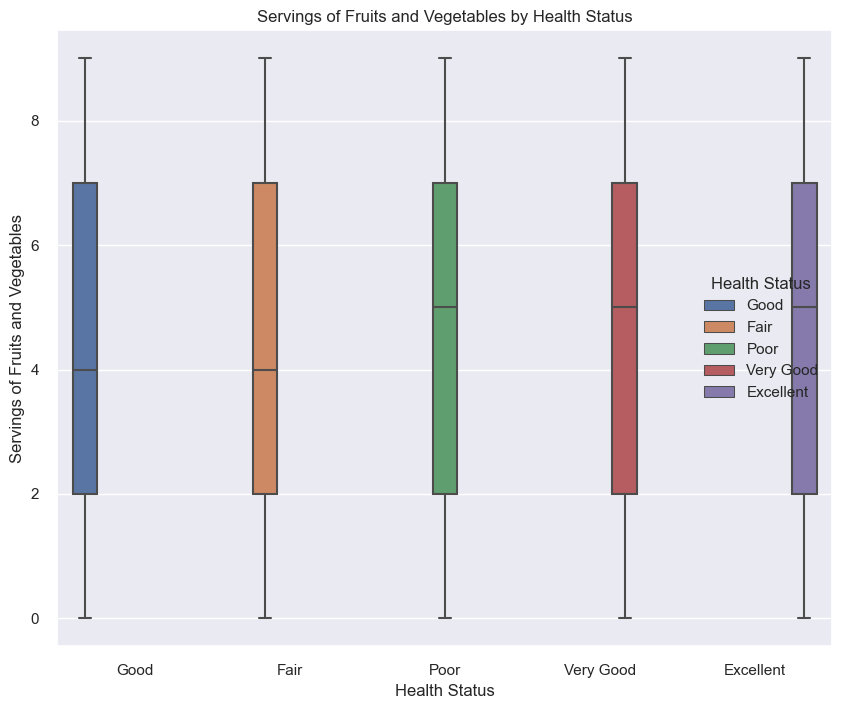

In [83]:
# Step 4: Create visualizations
# Box plot of BMI and servings_fruits_veggies colored by self-reported health status
print("Box plot of BMI and servings_fruits_veggies colored by self-reported health status:")
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='self_reported_health_status', y='BMI', hue='self_reported_health_status')
plt.title('BMI and Servings of Fruits and Vegetables by Health Status')
plt.xlabel('Health Status')
plt.ylabel('BMI')
plt.legend(title='Health Status')
plt.show()

# Box plot of servings_fruits_veggies colored by self-reported health status
print("Box plot of servings_fruits_veggies colored by self-reported health status:")
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='self_reported_health_status', y='servings_fruits_veggies', hue='self_reported_health_status')
plt.title('Servings of Fruits and Vegetables by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Servings of Fruits and Vegetables')
plt.legend(title='Health Status')
plt.show()

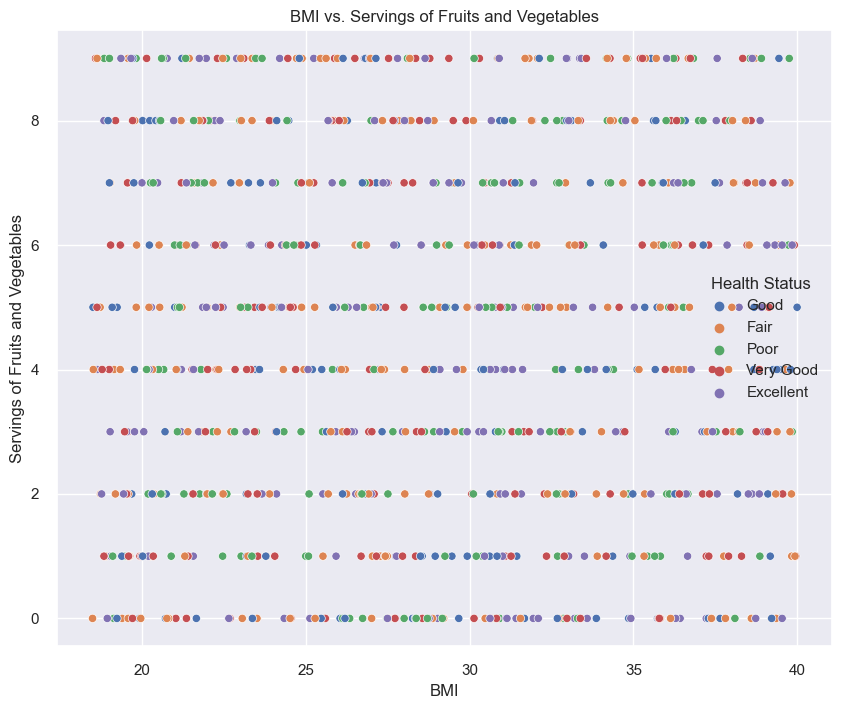

In [82]:
# Scatter plot of BMI vs. servings_fruits_veggies colored by self-reported health status
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='BMI', y='servings_fruits_veggies', hue='self_reported_health_status')
plt.title('BMI vs. Servings of Fruits and Vegetables')
plt.xlabel('BMI')
plt.ylabel('Servings of Fruits and Vegetables')
plt.legend(title='Health Status')
plt.show()

## Data Distribution

In [84]:
df.drop(columns=['gender'], inplace=True)

In [85]:
target = 'self_reported_health_status'
features = [col for col in df.columns if col != target]

In [86]:
def plot_distribution(df, col):
    sns.distplot(df[col])
    plt.title(f'Distributions of {col}')
    plt.show()

In [87]:
def plot_box(df, col):
    sns.boxplot(df[col])
    plt.title(f'Distributions of {col}')
    plt.show()
    print()

C:\Users\FHKHASAN\AppData\Local\Temp\ipykernel_21088\33970777.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


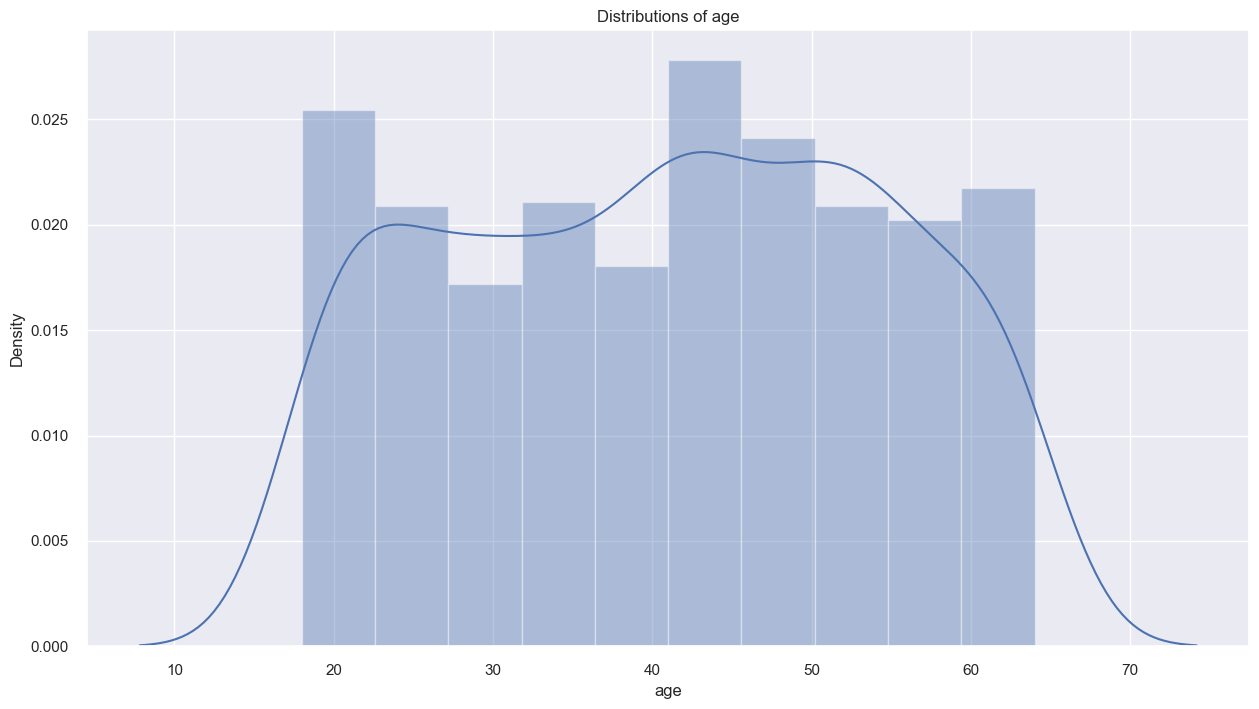

C:\Users\FHKHASAN\AppData\Local\Temp\ipykernel_21088\33970777.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


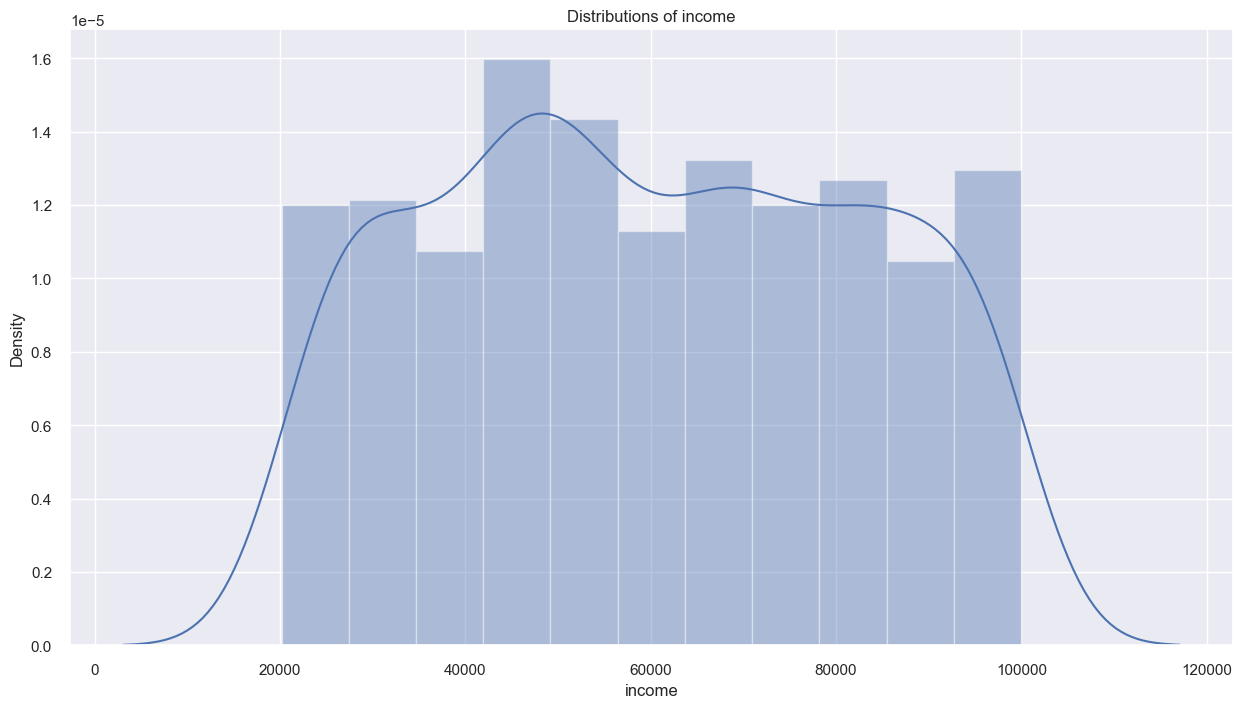

C:\Users\FHKHASAN\AppData\Local\Temp\ipykernel_21088\33970777.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


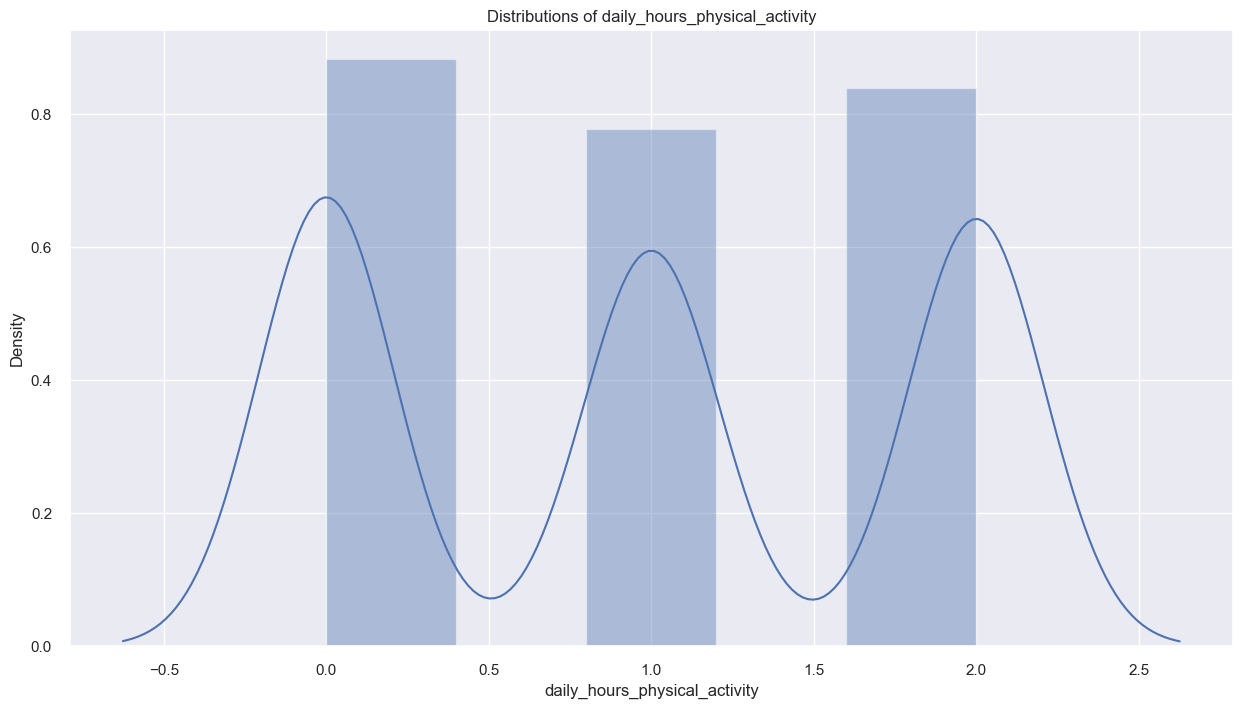

C:\Users\FHKHASAN\AppData\Local\Temp\ipykernel_21088\33970777.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


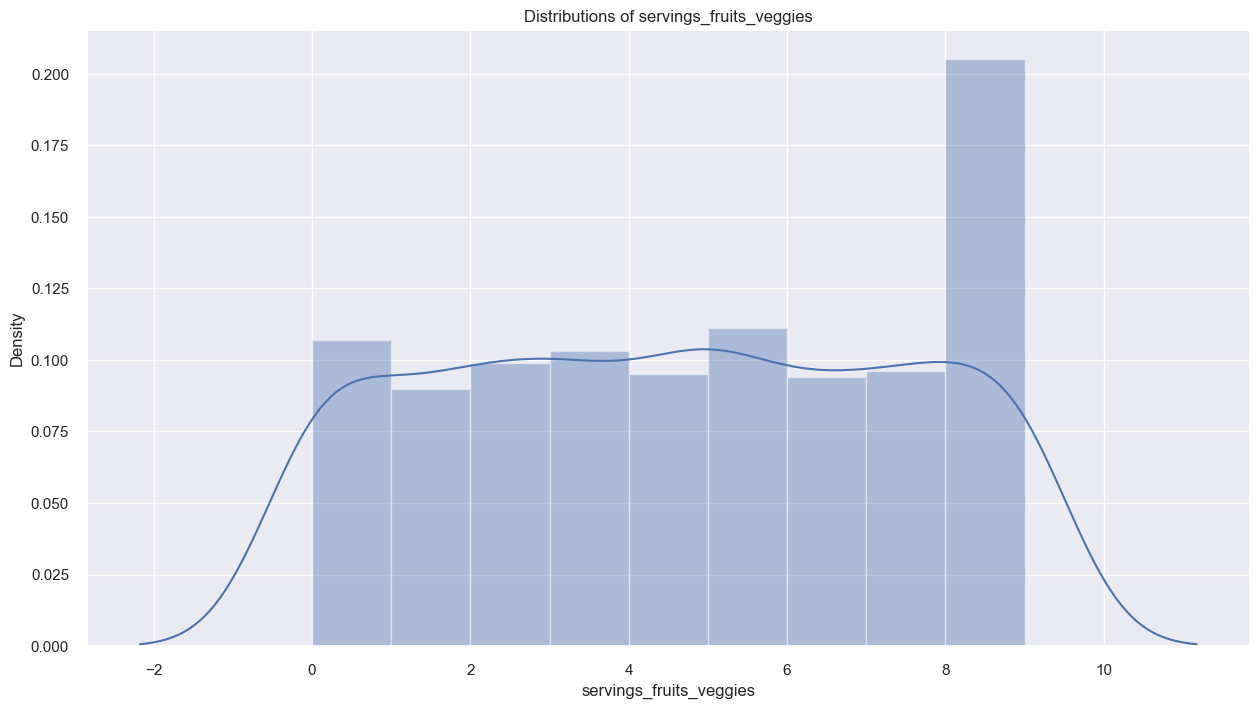

C:\Users\FHKHASAN\AppData\Local\Temp\ipykernel_21088\33970777.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


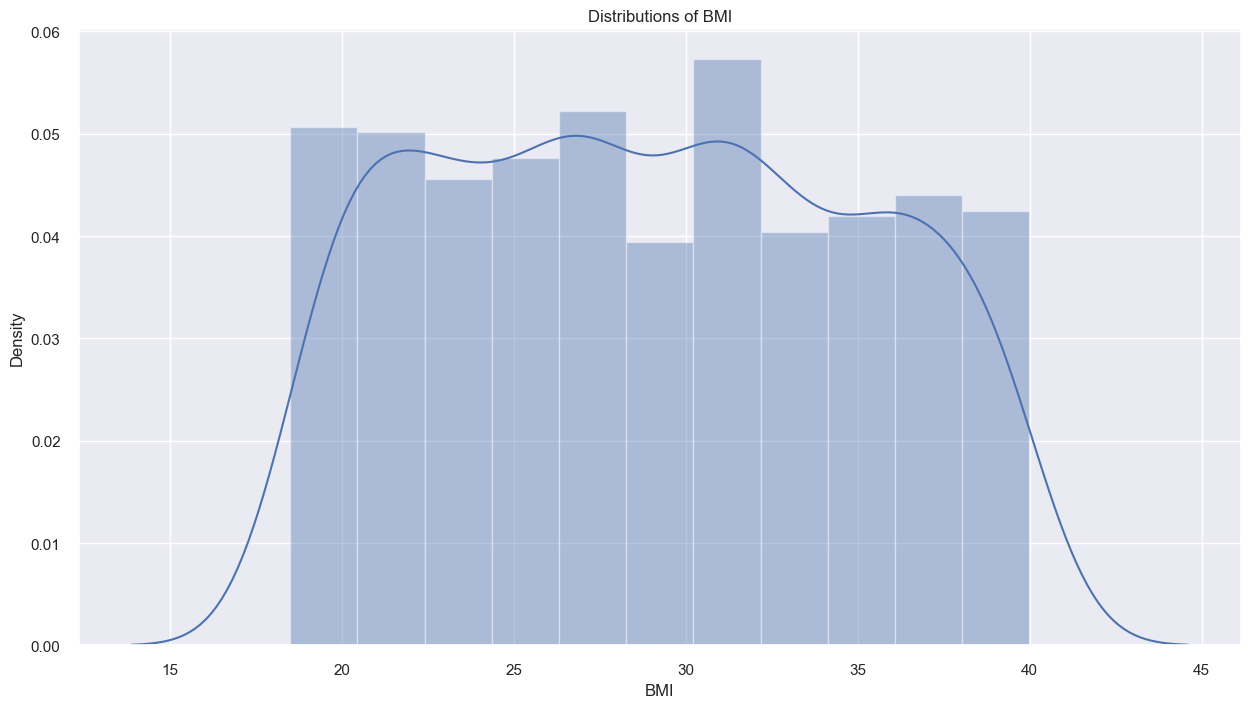

In [88]:
for col in features:
    plot_distribution(df, col)